In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def compute_img_histograms (source_path, histogram_bins, files_to_process=None):
    files = os.listdir(source_path)
    
    if files_to_process is None:
        nifti_files = [file for file in files if file.endswith('.nii.gz')]
    else:
        nifti_files = [file for file in files if file.endswith('.nii.gz')][:files_to_process]

    histogram_list = []

    for file in nifti_files:
        file_path = os.path.join(source_path, file)
        nii_img = nib.load(file_path)
        nii_data = nii_img.get_fdata()
        histogram_list.append(np.histogram(nii_data.flatten(), bins=histogram_bins))
    
    return histogram_list

In [3]:
hist_list = compute_img_histograms("D:\\pythonscripts_ETIS\\SkullStripping_Check\\SkullStripped_SWI_zscore_saturated", 500, 6)

In [25]:
hist_list_norm = compute_img_histograms("D:\\data_processed_ETIS\\SkullStripped_Images\\SkullStripped_SWI_zscore_saturated", 500, 6)

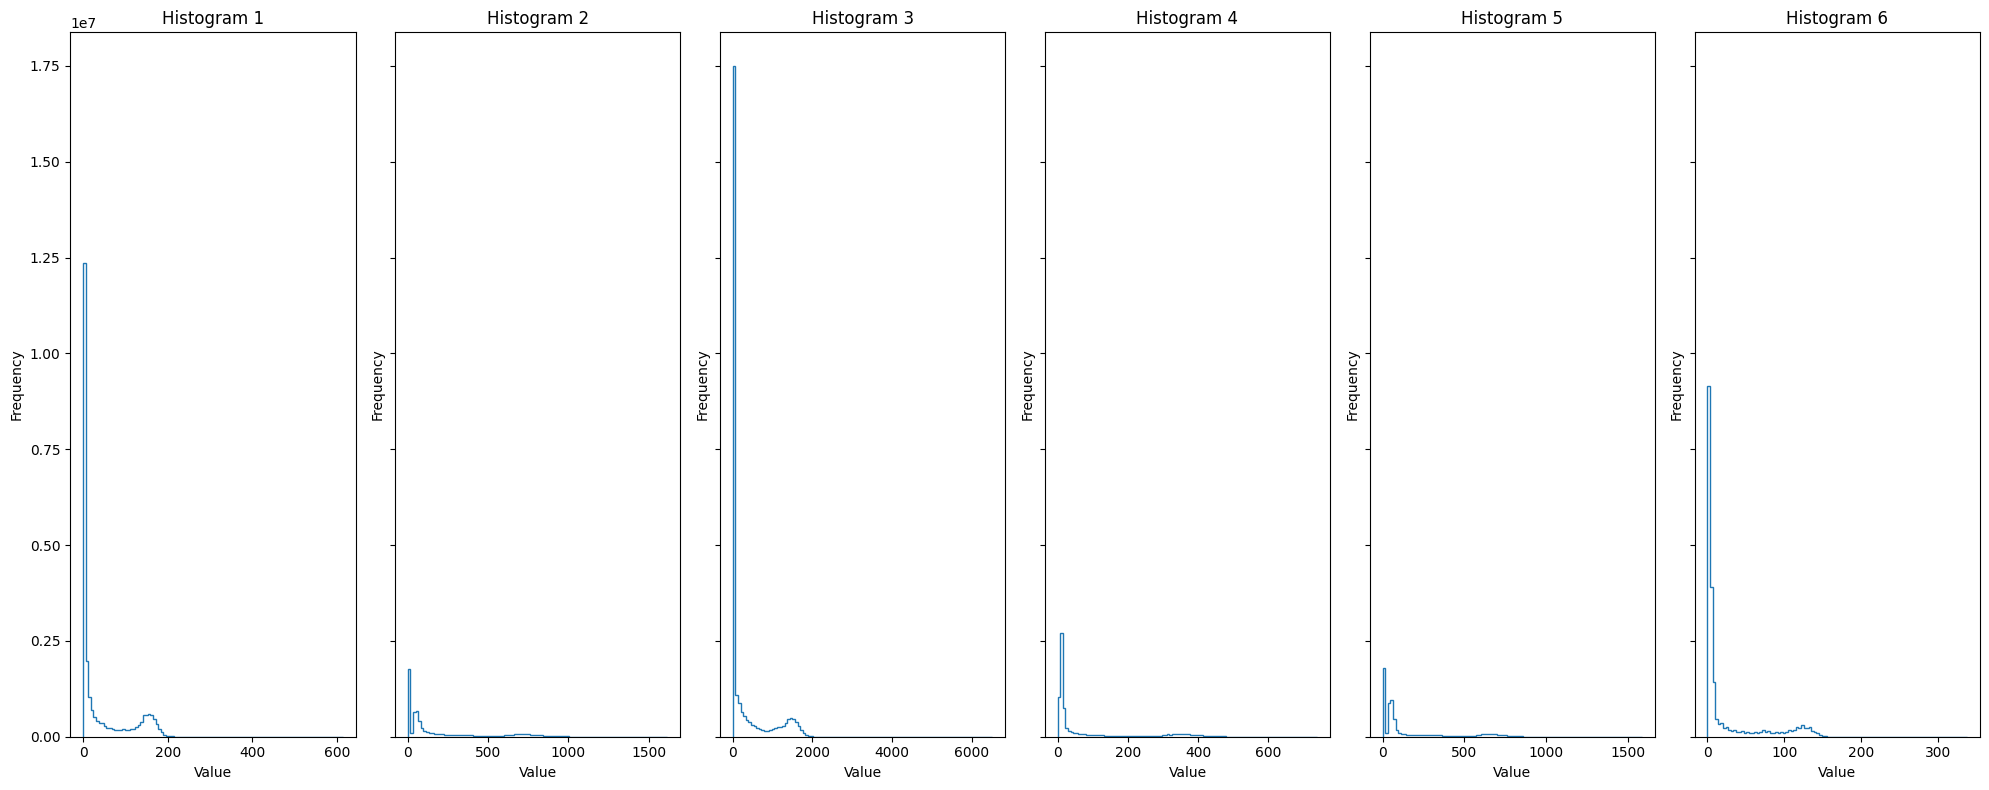

In [27]:
fig, axs = plt.subplots(1, 6, figsize=(20, 8), sharey=True)

axs = axs.flatten()

for i, hist_data in enumerate(hist_list):
    counts, bins = hist_data
    
    # Compute histogram
    axs[i].hist(bins[:-1], bins, weights=counts, histtype="step")
    
    # Customize histogram appearance
    axs[i].set_title(f'Histogram {i+1}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

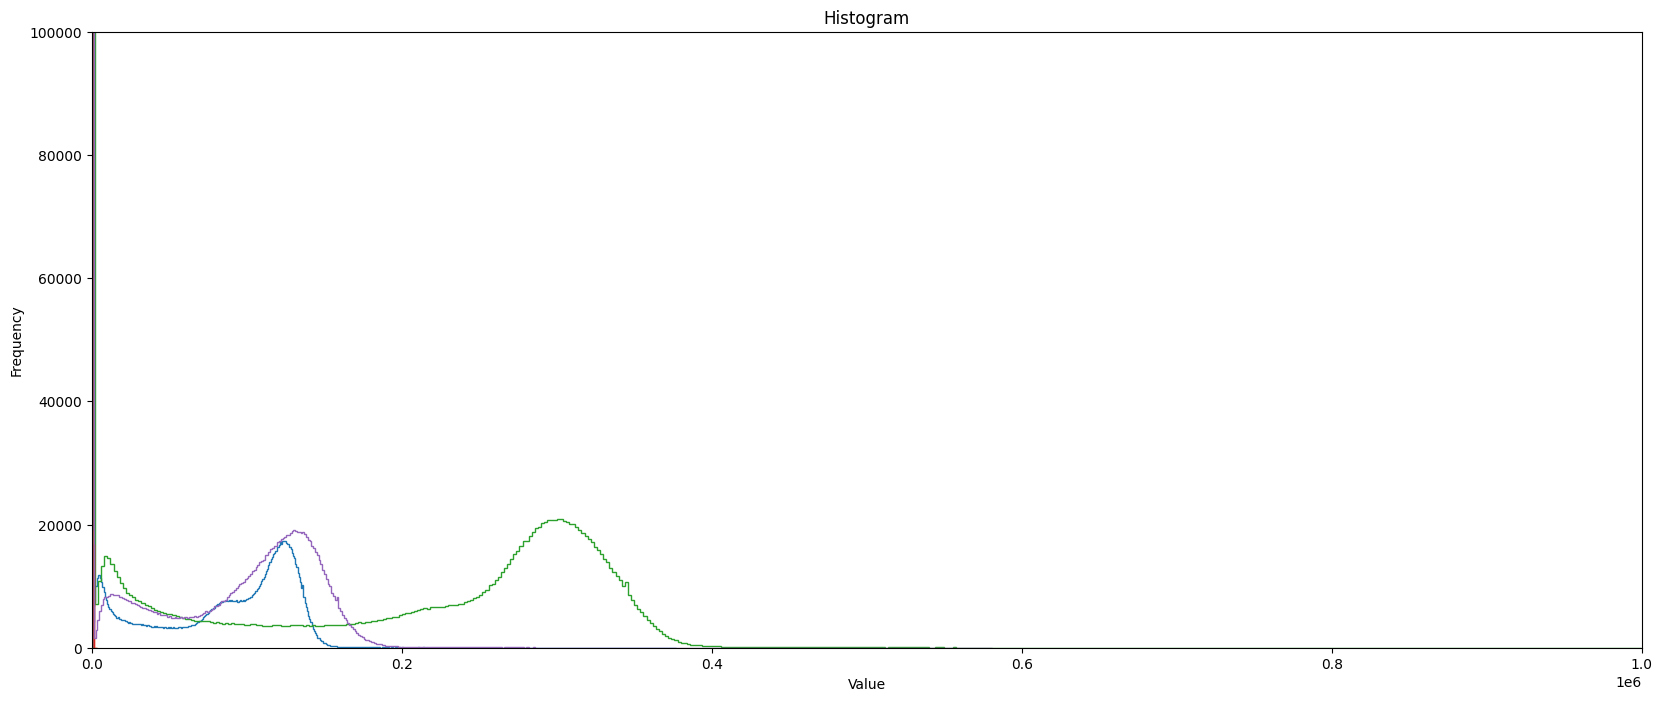

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))

for i, hist_data in enumerate(hist_list):
    counts, bins = hist_data
    
    plt.hist(bins[:-1], bins, weights=counts, histtype="step")
    
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_xlim(0,1000000)
ax.set_ylabel('Frequency')
ax.set_ylim(0,100000)

plt.show()

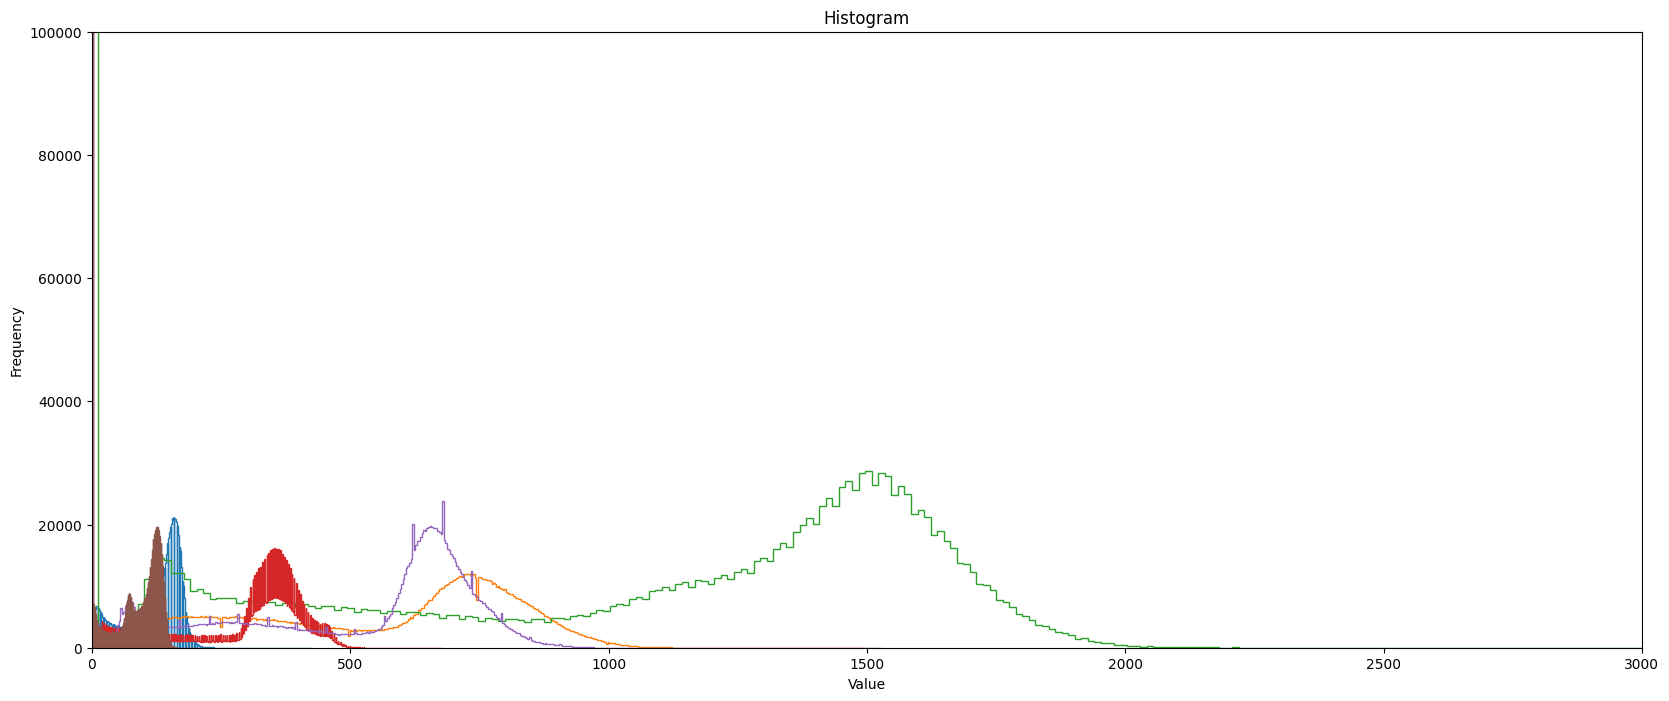

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))

for i, hist_data in enumerate(hist_list_norm):
    counts, bins = hist_data
    
    plt.hist(bins[:-1], bins, weights=counts, histtype="step")
    
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_xlim(0,3000)
ax.set_ylabel('Frequency')
ax.set_ylim(0,100000)
plt.show()

In [14]:
swi_nii_img = nib.load("D:\\pythonscripts_ETIS\\SkullStripping_Check\\SWI_Resized\\2018-104_02-10241-D0MR_701_SWIp_50s_.nii.gz")
swi_nii_data = swi_nii_img.get_fdata()
tof_nii_img = nib.load("D:\\pythonscripts_ETIS\\SkullStripping_Check\\TOF3D_Resized\\2018-104_02-10241-D0MR_401_TOF_MC4_0.8x1.3_.nii.gz")
tof_nii_data = tof_nii_img.get_fdata()

In [23]:
swi_ss_nii_img = nib.load("D:\\pythonscripts_ETIS\\SkullStripping_Check\\SkullStripped_SWI_zscore_saturated\\2018-104_02-10241-D0MR_701_SWIp_50s__SkullStripped.nii.gz")
swi_ss_nii_data = swi_nii_img.get_fdata()